<a href="https://colab.research.google.com/github/alok13/Machine-Learning/blob/master/Titanic_take_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np

In [60]:
import os
os.environ['KAGGLE_USERNAME'] = "alok13" # username from the json file
os.environ['KAGGLE_KEY'] = "0a84636fc75d4a9f43d87644d220855d" # key from the json file
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import matplotlib.pyplot as plt

In [62]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Age wrt Survived')

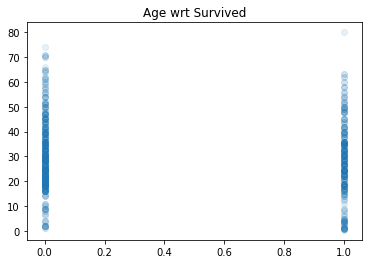

In [63]:
plt.scatter(df.Survived,df.Age, alpha=0.1)
plt.title("Age wrt Survived")

Text(0.5, 1.0, 'Survived')

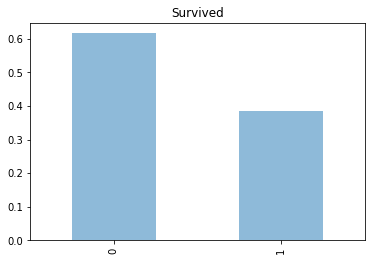

In [64]:
df.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Survived")

Text(0.5, 1.0, 'Class')

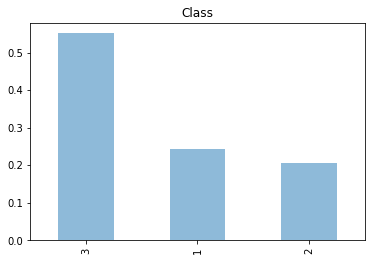

In [65]:
df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Class")

Text(0.5, 1.0, 'embarked')

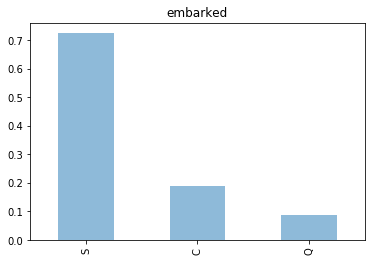

In [66]:
df.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("embarked")

Text(0.5, 1.0, 'Sex of Survived')

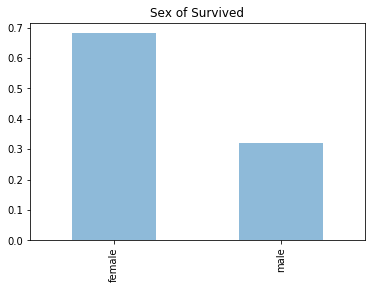

In [67]:
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Sex of Survived")

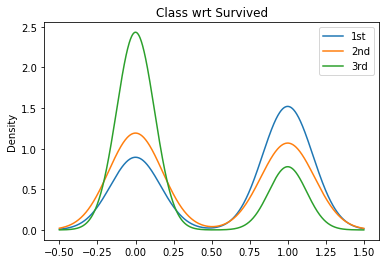

In [68]:
for x in [1,2,3]:
  df.Survived[df.Pclass==x].plot(kind="kde")
plt.title("Class wrt Survived")
plt.legend(("1st","2nd","3rd"))  

Text(0.5, 1.0, 'Rich Men Survived')

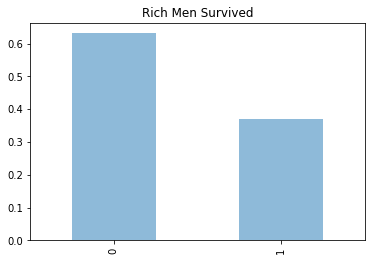

In [69]:
df.Survived[(df.Sex=="male") & (df.Pclass==1)].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Rich Men Survived")

Text(0.5, 1.0, 'Poor Men Survived')

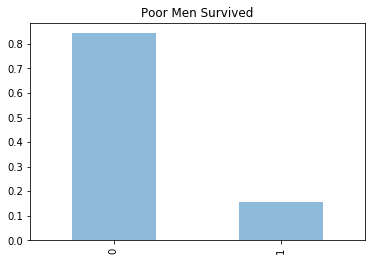

In [70]:
df.Survived[(df.Sex=="male") & (df.Pclass==2)].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Poor Men Survived")

Text(0.5, 1.0, 'Rich Women Survived')

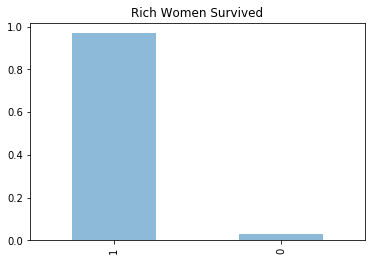

In [71]:
df.Survived[(df.Sex=="female") & (df.Pclass==1)].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Rich Women Survived")

Text(0.5, 1.0, 'Poor women Survived')

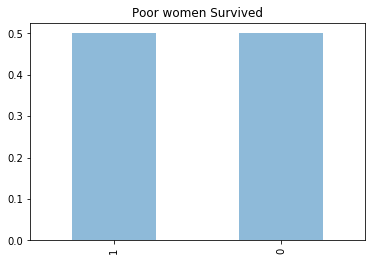

In [72]:
df.Survived[(df.Sex=="female") & (df.Pclass==3)].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Poor women Survived")

Clean Data

In [0]:
df["Fare"]=df["Fare"].fillna(df["Fare"].dropna().median())
df["Age"]=df["Age"].fillna(df["Age"].dropna().median())

In [0]:
df.loc[df["Sex"]== "male", "Sex"]=0
df.loc[df["Sex"]== "female", "Sex"]=1

In [0]:
df["Embarked"]=df["Embarked"].fillna("S")
df.loc[df["Embarked"]== "S", "Embarked"]=0
df.loc[df["Embarked"]== "C", "Embarked"]=1
df.loc[df["Embarked"]== "Q", "Embarked"]=2

In [76]:
from sklearn import linear_model


target=df["Survived"].values
feature=df[["Pclass","Age","Sex","SibSp","Parch"]].values

classifier=linear_model.LogisticRegression()
classfier_=classifier.fit(feature,target)

classfier_.score(feature,target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

In [77]:
target=df["Survived"].values
feature=df[["Pclass","Age","Sex","Embarked","SibSp","Parch"]].values

classifier=linear_model.LogisticRegression()
classfier_=classifier.fit(feature,target)

classfier_.score(feature,target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8002244668911336

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
poly_feature=poly.fit_transform(feature)
##classifier=linear_model.LogisticRegression()
classifier_=classifier.fit(poly_feature,target)
classfier_.score(poly_feature,target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8361391694725028

In [79]:
from sklearn import tree,model_selection


decision_tree=tree.DecisionTreeClassifier(random_state=1)
decision_tree_= decision_tree.fit(feature,target) 

decision_tree_.score(feature,target)

0.936026936026936

In [80]:
from sklearn import model_selection
feature=df[["Pclass","Age","Sex","Embarked","SibSp","Parch"]].values
generalized_tree=tree.DecisionTreeClassifier(random_state=1,max_depth=7,min_samples_split=2)
generalized_tree_=generalized_tree.fit(feature,target)
generalized_tree_.score(feature,target)

0.8664421997755332

In [81]:
score=model_selection.cross_val_score(generalized_tree,feature,target,scoring='accuracy',cv=50)
score
score.mean()

0.8059313725490196

In [0]:
test_df=pd.read_csv("test.csv")
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].dropna().median())
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].dropna().median())
test_df.loc[test_df["Sex"]== "male", "Sex"]=0
test_df.loc[test_df["Sex"]== "female", "Sex"]=1

test_df["Embarked"]=test_df["Embarked"].fillna("S")
test_df.loc[test_df["Embarked"]== "S", "Embarked"]=0
test_df.loc[test_df["Embarked"]== "C", "Embarked"]=1
test_df.loc[test_df["Embarked"]== "Q", "Embarked"]=2


features=test_df[["Pclass","Age","Sex","Embarked","SibSp","Parch"]].values
Y_pred_RF = generalized_tree_.predict(features)

**NOTE TO SELF: File is in Drive folder not downlaoded by itself.**

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF
    })

submission.to_csv('titanic_1.csv', index=False)